### funcion hipergeometrica

/home/fdavilakurban/anaconda2/envs/fede3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in true_divide
/media/fdavilakurban/0a842929-67de-4adc-b64c-8bc6d17a08b0/fdavilakurban/Proyectos/VPF/codes/cicTools.py:571: RuntimeWarning: divide by zero encountered in log
  return chi*abs(P0err/(P0*abs(np.log(P0)))-N_mean_std/N_mean)
/media/fdavilakurban/0a842929-67de-4adc-b64c-8bc6d17a08b0/fdavilakurban/Proyectos/VPF/codes/cicTools.py:571: RuntimeWarning: invalid value encountered in multiply
  return chi*abs(P0err/(P0*abs(np.log(P0)))-N_mean_std/N_mean)


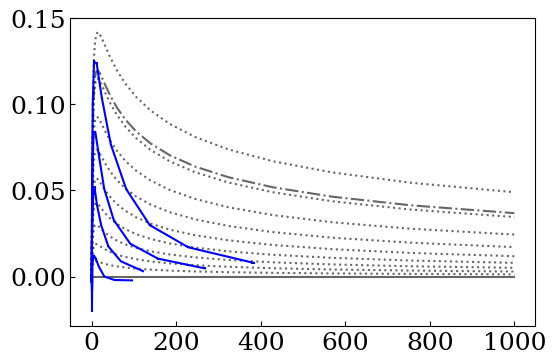

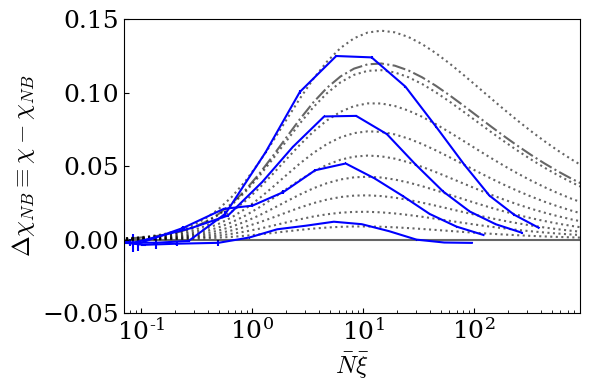

In [2]:
import numpy as np
from cicTools import *
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import special

fs = 18
ms = 8

plt.rcParams["xtick.labelsize"] = fs
plt.rcParams["ytick.labelsize"] = fs
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams["font.family"] = "serif"
plt.rcParams["ytick.direction"] = 'in'
plt.rcParams["xtick.direction"] = 'in'

def chi_NB(x):
    return np.log(1+x)/x
def chi_T(x):
    return (np.sqrt(1+2*x)-1)/x
def chi_GH1(x,a):
    term1=(1+x/a)
    power1=(1-a)
    denom=(1-a)*(x)
    return (term1**power1-1)*a/(denom)
def chi_GH(x,a):
    term1=(1+x/a)
    power1=(1-a)
    denom=(1-a)*(x)
    return (term1**power1-1)*a/(denom)
def chi_min(x):
    return (1-np.exp(-x))/x

a = 1.5

fig, ax = plt.subplots(1, 1, figsize=(6, 4))


xmin, xmax = 1E-3, 1E3 
x = np.geomspace(xmin,xmax,50)

for a in np.linspace(0.45,1,10):
    c=1
    ax.plot(x,chi_GH(x*c,a)-chi_NB(x*c),c='k',ls=':',alpha=0.6)
#ax.plot(x,chi_GH1(x,.7)-chi_NB(x),c='k',ls='--',alpha=0.6)
ax.plot(x,chi_NB(x)-chi_NB(x),c='k',alpha=0.6)
ax.plot(x,chi_T(x*c)-chi_NB(x*c),c='k',ls='-.',alpha=0.6)
#ax.plot(x,chi_min(x)-chi_NB(x),c='k',ls=':',alpha=0.6)


files = ['../data/allgxs_nesf100000_jk.npz',\
         '../data/allgxs_nesf100000_jk_snap67.npz',\
         '../data/allgxs_nesf100000_jk_snap50.npz',\
         '../data/allgxs_nesf100000_jk_snap33.npz']
for file in files:

    stats = np.load(file)

    chi = stats['arr_0']
    chi_std = stats['arr_1']
    NXi = stats['arr_2']
    NXi_std = stats['arr_3']
    P0 = stats['arr_4']
    P0_std = stats['arr_5']
    N_mean = stats['arr_6']
    N_mean_std = stats['arr_7']
    xi_mean = stats['arr_8']
    xi_mean_std = stats['arr_9']
    rs = stats['arr_10']

    P0err=delta_P0(P0,10E5)
    NXierr=delta_NXi(NXi,N_mean,N_mean_std,xi_mean,xi_mean_std)
    chierr=delta_chi(chi,P0,P0err,N_mean,N_mean_std)


    # chi vs Nxi
    ebar = ax.errorbar(NXi,chi-chi_NB(NXi),xerr=NXierr,yerr=chierr,color='b')



# Log Scale
#ax1.set_xscale('log')
ax.set_xscale('log')

# Y Labels
ax.set_ylabel(r'$\Delta\chi_{NB}\equiv\chi-\chi_{NB}$',fontsize=fs)
#ax1.set_ylabel(r'$\Delta\chi_{NB}\equiv\chi-\chi_{NB}$',fontsize=fs)

# Set Y axis to right side
# ax1.yaxis.set_label_position("right")
# ax1.yaxis.tick_right()

# X Labels
ax.set_xlabel(r'$\bar{N}\bar{\xi}$',fontsize=fs)
#ax1.set_xlabel(r'$\bar{N}\bar{\xi}$',fontsize=fs)

# Y axis limis
ylim1,ylim2 = -.05,.15
ax.set_ylim([ylim1,ylim2])
#ax1.set_ylim([ylim1,ylim2])

# X axis limits
xlim1,xlim2=7E-2,9E2
ax.set_xlim(xlim1,xlim2)
#ax1.set_xlim(xlim1,xlim2)

# Ticks
#ax.set_xticklabels([])
#ax1.set_yticklabels([])
ax.tick_params(labelsize=fs)
#ax1.tick_params(labelsize=fs)

# Final
plt.tight_layout()
#plt.subplots_adjust(hspace=0,wspace=0.03)
plt.subplots_adjust(wspace=0.01)

#plt.savefig('../plots/rVPF_redshift.pdf')
#plt.savefig('../plots/rVPF_redshift.png')
plt.show()

### error function erf(x)

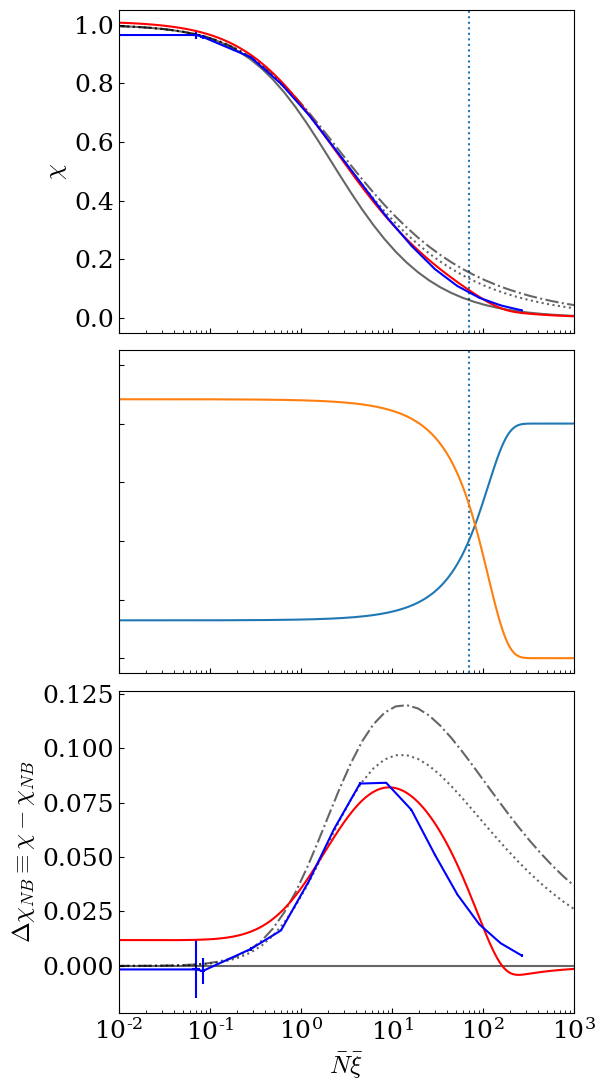

In [3]:
import numpy as np
from cicTools import *
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import special

fs = 18
ms = 8

plt.rcParams["xtick.labelsize"] = fs
plt.rcParams["ytick.labelsize"] = fs
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams["font.family"] = "serif"
plt.rcParams["ytick.direction"] = 'in'
plt.rcParams["xtick.direction"] = 'in'

def chi_NB(x):
    return np.log(1+x)/x
def chi_T(x):
    return (np.sqrt(1+2*x)-1)/x
def chi_GH1(x,a):
    term1=(1+x/a)
    power1=(1-a)
    denom=(1-a)*(x)
    return (term1**power1-1)*a/(denom)
def chi_GH(x,a):
    term1=(1+x/a)
    power1=(1-a)
    denom=(1-a)*(x)
    return (term1**power1-1)*a/(denom)
def chi_min(x):
    return (1-np.exp(-x))/x


fig, axs = plt.subplots(3, 1, figsize=(6, 11),sharex=True)
ax=axs[0]
ax1=axs[1]
ax2=axs[2]

xmin, xmax = 1E-3, 1E3 
x = np.geomspace(xmin,xmax,50)

# for a in np.linspace(0.45,1,10):
#     print(a)
#     c=1
#     ax.plot(x,chi_GH(x*c,a)-chi_NB(x),c='k',ls=':',alpha=0.6
a=.56
ax.plot(x,chi_GH(x,a),c='k',ls=':',alpha=0.6)
ax.plot(x,chi_NB(x),c='k',alpha=0.6)
ax.plot(x,chi_T(x),c='k',ls='-.',alpha=0.6)


ax2.plot(x,chi_GH(x,a)-chi_NB(x),c='k',ls=':',alpha=0.6)
ax2.plot(x,chi_NB(x)-chi_NB(x),c='k',alpha=0.6)
ax2.plot(x,chi_T(x)-chi_NB(x),c='k',ls='-.',alpha=0.6)

# files = ['../data/allgxs_nesf100000_jk.npz',\
#          '../data/allgxs_nesf100000_jk_snap67.npz',\
#          '../data/allgxs_nesf100000_jk_snap50.npz',\
#          '../data/allgxs_nesf100000_jk_snap33.npz']
files = ['../data/allgxs_nesf100000_jk_snap67.npz']
for file in files:

    stats = np.load(file)

    chi = stats['arr_0']
    chi_std = stats['arr_1']
    NXi = stats['arr_2']
    NXi_std = stats['arr_3']
    P0 = stats['arr_4']
    P0_std = stats['arr_5']
    N_mean = stats['arr_6']
    N_mean_std = stats['arr_7']
    xi_mean = stats['arr_8']
    xi_mean_std = stats['arr_9']
    rs = stats['arr_10']

    P0err=delta_P0(P0,10E5)
    NXierr=delta_NXi(NXi,N_mean,N_mean_std,xi_mean,xi_mean_std)
    chierr=delta_chi(chi,P0,P0err,N_mean,N_mean_std)


    # chi vs Nxi
    ebar = ax.errorbar(NXi,chi,xerr=NXierr,yerr=chierr,color='b')
    ebar2 = ax2.errorbar(NXi,chi-chi_NB(NXi),xerr=NXierr,yerr=chierr,color='b')

#print(NXi)

# Log Scale
ax1.set_xscale('log')
ax.set_xscale('log')
ax2.set_xscale('log')

# Y Labels
ax2.set_ylabel(r'$\Delta\chi_{NB}\equiv\chi-\chi_{NB}$',fontsize=fs)
ax.set_ylabel(r'$\chi$',fontsize=fs)

# X Labels
#ax.set_xlabel(r'$\bar{N}\bar{\xi}$',fontsize=fs)
ax2.set_xlabel(r'$\bar{N}\bar{\xi}$',fontsize=fs)

# Y axis limis
ylim1,ylim2 = -0.05,1.05
ax.set_ylim([ylim1,ylim2])
ax1.set_ylim([-.05,1.05])

# X axis limits
xlim1,xlim2=1E-2,1E3
ax.set_xlim(xlim1,xlim2)
ax1.set_xlim(xlim1,xlim2)

# Ticks
ax1.set_yticklabels([])
ax.tick_params(labelsize=fs)
ax1.tick_params(labelsize=fs)

# Final
plt.tight_layout()
plt.subplots_adjust(wspace=0.01)


#factor=.1
xc=70
ax.vlines(xc,ylim1,ylim2,ls=':')
ax1.vlines(xc,-.05,1.05,ls=':')
xe=np.geomspace(1E-3,1E3,500)
#print(xe)
f=.01
erf_=special.erf((xe-xc)*f)
ierf_=1-special.erf((xe-xc)*f)
erf=(1+erf_)/2.5
ierf=ierf_/1.9
ax1.plot(xe,erf)
ax1.plot(xe,ierf)
#ax.plot(xe,((ierf*(chi_T(xe))+erf*(chi_NB(xe))))-chi_NB(xe))
def chi_mix(x,a):
    return ierf*chi_GH(x,a)+erf*(chi_NB(xe))
ax.plot(xe,chi_mix(xe,a),c='r')
ax2.plot(xe,chi_mix(xe,a)-chi_NB(xe),c='r')

plt.show()

### gauss in log: lognormal(x)

mean: 22.75989509352673 median: 7.38905609893065 mode: 0.7788007830714049
2 1.5


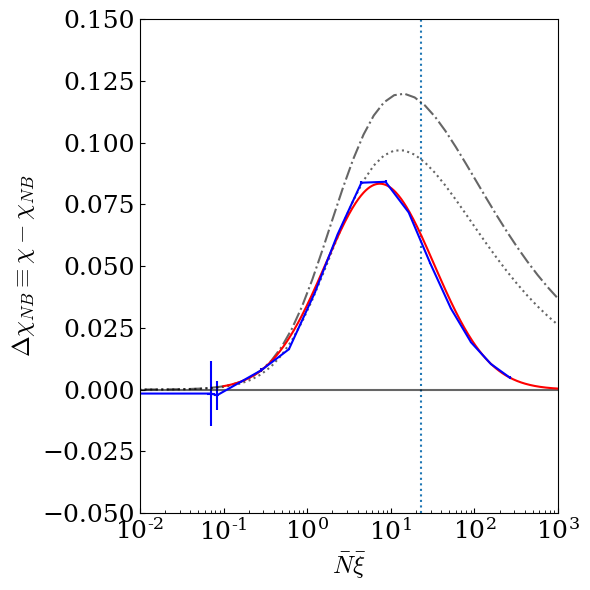

In [44]:
import numpy as np
from cicTools import *
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import special

fs = 18
ms = 8

plt.rcParams["xtick.labelsize"] = fs
plt.rcParams["ytick.labelsize"] = fs
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams["font.family"] = "serif"
plt.rcParams["ytick.direction"] = 'in'
plt.rcParams["xtick.direction"] = 'in'

def chi_NB(x):
    return np.log(1+x)/x
def chi_T(x):
    return (np.sqrt(1+2*x)-1)/x
def chi_GH1(x,a):
    term1=(1+x/a)
    power1=(1-a)
    denom=(1-a)*(x)
    return (term1**power1-1)*a/(denom)
def chi_GH(x,a):
    term1=(1+x/a)
    power1=(1-a)
    denom=(1-a)*(x)
    return (term1**power1-1)*a/(denom)
def chi_min(x):
    return (1-np.exp(-x))/x


fig, ax = plt.subplots(1, 1, figsize=(6, 6))

xmin, xmax = 1E-3, 1E3 
x = np.geomspace(xmin,xmax,50)

# for a in np.linspace(0.45,1,10):
#     print(a)
#     c=1
#     ax.plot(x,chi_GH(x*c,a)-chi_NB(x),c='k',ls=':',alpha=0.6
a=.56
ax.plot(x,chi_GH(x,a)-chi_NB(x),c='k',ls=':',alpha=0.6)
ax.plot(x,chi_NB(x)-chi_NB(x),c='k',alpha=0.6)
ax.plot(x,chi_T(x)-chi_NB(x),c='k',ls='-.',alpha=0.6)


# files = ['../data/allgxs_nesf100000_jk.npz',\
#          '../data/allgxs_nesf100000_jk_snap67.npz',\
#          '../data/allgxs_nesf100000_jk_snap50.npz',\
#          '../data/allgxs_nesf100000_jk_snap33.npz']
files = ['../data/allgxs_nesf100000_jk_snap67.npz']
for file in files:

    stats = np.load(file)

    chi = stats['arr_0']
    chi_std = stats['arr_1']
    NXi = stats['arr_2']
    NXi_std = stats['arr_3']
    P0 = stats['arr_4']
    P0_std = stats['arr_5']
    N_mean = stats['arr_6']
    N_mean_std = stats['arr_7']
    xi_mean = stats['arr_8']
    xi_mean_std = stats['arr_9']
    rs = stats['arr_10']

    P0err=delta_P0(P0,10E5)
    NXierr=delta_NXi(NXi,N_mean,N_mean_std,xi_mean,xi_mean_std)
    chierr=delta_chi(chi,P0,P0err,N_mean,N_mean_std)


    # chi vs Nxi
    ebar = ax.errorbar(NXi,chi-chi_NB(NXi),xerr=NXierr,yerr=chierr,color='b')



# Log Scale
#ax1.set_xscale('log')
ax.set_xscale('log')

# Y Labels
ax.set_ylabel(r'$\Delta\chi_{NB}\equiv\chi-\chi_{NB}$',fontsize=fs)

# X Labels
ax.set_xlabel(r'$\bar{N}\bar{\xi}$',fontsize=fs)
#ax1.set_xlabel(r'$\bar{N}\bar{\xi}$',fontsize=fs)

# Y axis limis
ylim1,ylim2 = -0.05,.15
ax.set_ylim([ylim1,ylim2])
#ax1.set_ylim([-.05,1.05])

# X axis limits
xlim1,xlim2=1E-2,1E3
ax.set_xlim(xlim1,xlim2)
#ax1.set_xlim(xlim1,xlim2)

# Ticks
#ax1.set_yticklabels([])
ax.tick_params(labelsize=fs)
#ax1.tick_params(labelsize=fs)

# Final
plt.tight_layout()
plt.subplots_adjust(wspace=0.01)

#GAUSSIANA

xe=np.geomspace(.1,1E3,500)
#xe_lin=np.linspace(1E-4,1E4,15)
#print(chi-chi_NB(NXi))
#print(np.log(chi-chi_NB(NXi)))
# mu=np.nansum(NXi)/len(NXi)
# sigma=np.sqrt(np.nansum(((NXi)-mu)**2)/len(NXi))
mu, sigma = 2, 1.5
mean = np.exp(mu+sigma**2/2)
median = np.exp(mu)
mode = np.exp(mu-sigma**2)
print('mean:',mean, 'median:',median, 'mode:', mode)
ax.vlines(mean,ylim1,ylim2,ls=':')
print(mu,sigma)
lognorm = np.exp(-(np.log(xe)-mu)**2/(2*sigma**2))/12\
          #/(xe*sigma*np.sqrt(2*np.pi)))

ax.plot(xe, lognorm,color='r')

plt.show()

[0.45, 0.56, 0.69, 0.92]
mean: 16.860944986089034 median: 5.4739473917272 mode: 0.5769498103804866
1.7 1.5


/media/fdavilakurban/0a842929-67de-4adc-b64c-8bc6d17a08b0/fdavilakurban/Proyectos/VPF/codes/cicTools.py:571: RuntimeWarning: divide by zero encountered in log
  return chi*abs(P0err/(P0*abs(np.log(P0)))-N_mean_std/N_mean)
/media/fdavilakurban/0a842929-67de-4adc-b64c-8bc6d17a08b0/fdavilakurban/Proyectos/VPF/codes/cicTools.py:571: RuntimeWarning: invalid value encountered in multiply
  return chi*abs(P0err/(P0*abs(np.log(P0)))-N_mean_std/N_mean)


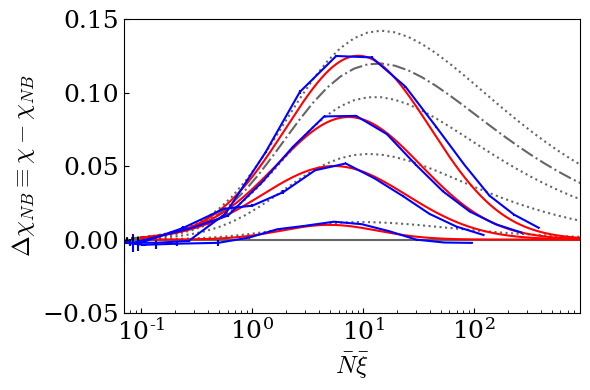

In [86]:
import numpy as np
from cicTools import *
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import special

fs = 18
ms = 8

plt.rcParams["xtick.labelsize"] = fs
plt.rcParams["ytick.labelsize"] = fs
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams["font.family"] = "serif"
plt.rcParams["ytick.direction"] = 'in'
plt.rcParams["xtick.direction"] = 'in'

def chi_NB(x):
    return np.log(1+x)/x
def chi_T(x):
    return (np.sqrt(1+2*x)-1)/x
def chi_GH1(x,a):
    term1=(1+x/a)
    power1=(1-a)
    denom=(1-a)*(x)
    return (term1**power1-1)*a/(denom)
def chi_GH(x,a):
    term1=(1+x/a)
    power1=(1-a)
    denom=(1-a)*(x)
    return (term1**power1-1)*a/(denom)
def chi_min(x):
    return (1-np.exp(-x))/x

a = 1.5

fig, ax = plt.subplots(1, 1, figsize=(6, 4))


xmin, xmax = 1E-3, 1E3 
x = np.geomspace(xmin,xmax,50)
aa = np.linspace(.45,1,10)
aa = [.45,.56,.69,.92]
print(aa)
for a in aa:
    c=1
    ax.plot(x,chi_GH(x*c,a)-chi_NB(x*c),c='k',ls=':',alpha=0.6)
#ax.plot(x,chi_GH1(x,.7)-chi_NB(x),c='k',ls='--',alpha=0.6)
ax.plot(x,chi_NB(x)-chi_NB(x),c='k',alpha=0.6)
ax.plot(x,chi_T(x*c)-chi_NB(x*c),c='k',ls='-.',alpha=0.6)
#ax.plot(x,chi_min(x)-chi_NB(x),c='k',ls=':',alpha=0.6)


files = ['../data/allgxs_nesf100000_jk.npz',\
         '../data/allgxs_nesf100000_jk_snap67.npz',\
         '../data/allgxs_nesf100000_jk_snap50.npz',\
         '../data/allgxs_nesf100000_jk_snap33.npz']
for file in files:

    stats = np.load(file)

    chi = stats['arr_0']
    chi_std = stats['arr_1']
    NXi = stats['arr_2']
    NXi_std = stats['arr_3']
    P0 = stats['arr_4']
    P0_std = stats['arr_5']
    N_mean = stats['arr_6']
    N_mean_std = stats['arr_7']
    xi_mean = stats['arr_8']
    xi_mean_std = stats['arr_9']
    rs = stats['arr_10']

    P0err=delta_P0(P0,10E5)
    NXierr=delta_NXi(NXi,N_mean,N_mean_std,xi_mean,xi_mean_std)
    chierr=delta_chi(chi,P0,P0err,N_mean,N_mean_std)


    # chi vs Nxi
    ebar = ax.errorbar(NXi,chi-chi_NB(NXi),xerr=NXierr,yerr=chierr,color='b')



# Log Scale
ax.set_xscale('log')

# Y Labels
ax.set_ylabel(r'$\Delta\chi_{NB}\equiv\chi-\chi_{NB}$',fontsize=fs)

# X Labels
ax.set_xlabel(r'$\bar{N}\bar{\xi}$',fontsize=fs)

# Y axis limis
ylim1,ylim2 = -.05,.15
ax.set_ylim([ylim1,ylim2])

# X axis limits
xlim1,xlim2=7E-2,9E2
ax.set_xlim(xlim1,xlim2)

# Ticks
ax.tick_params(labelsize=fs)

def lognorm(xe,mu,sigma,norm):
    return np.exp(-(np.log(xe)-mu)**2/(2*sigma**2))/norm

xe=np.geomspace(.1,1E3,500)
mu, sigma = 1.7, 1.5
#mu,sigma=1.8,1.5
#norm = xe*sigma*np.sqrt(2*np.pi)
norm = 20
mean = np.exp(mu+sigma**2/2)
median = np.exp(mu)
mode = np.exp(mu-sigma**2)
print('mean:',mean, 'median:',median, 'mode:', mode)
#ax.vlines(median,ylim1,ylim2,ls=':',color='r')
print(mu,sigma)
#lognorm = np.exp(-(np.log(xe)-mu)**2/(2*sigma**2))/12
for mu,sigma,norm in ([2.2,1.5,8],[2,1.5,12],[1.7,1.5,20],[1.6,1,100]):
    ax.plot(xe, lognorm(xe,mu,sigma,norm),color='r')
#ax.plot(xe, lognorm,color='r')

# Final
plt.tight_layout()
plt.subplots_adjust(wspace=0.01)

plt.show()

### Usar scipy para encontrar los mejores parametros de la lognormal

[-3.91111111e-04  7.06201453e-02  8.35416385e-02  2.81934851e-01
  6.04523866e-01  1.23313518e+00  2.31293558e+00  4.45286307e+00
  8.64825027e+00  1.63620669e+01  2.96866751e+01  5.24384247e+01
  9.12271273e+01  1.56888725e+02  2.67525888e+02] [1.00019561 0.9646496  0.95810082 0.88875428 0.79846322 0.69071652
 0.58073186 0.4646393  0.34621631 0.24615115 0.16636733 0.10864304
 0.06869043 0.04266327 0.02564196]
[1. 1. 1.]


/home/fdavilakurban/anaconda2/envs/fede3/lib/python3.7/site-packages/ipykernel_launcher.py:117: RuntimeWarning: invalid value encountered in log
/home/fdavilakurban/anaconda2/envs/fede3/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


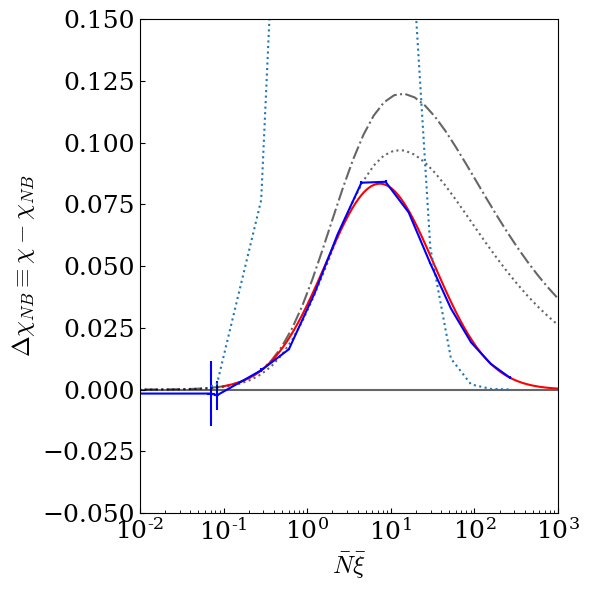

In [101]:
import numpy as np
from cicTools import *
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import special
from scipy import stats

fs = 18
ms = 8

plt.rcParams["xtick.labelsize"] = fs
plt.rcParams["ytick.labelsize"] = fs
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams["font.family"] = "serif"
plt.rcParams["ytick.direction"] = 'in'
plt.rcParams["xtick.direction"] = 'in'

def chi_NB(x):
    return np.log(1+x)/x
def chi_T(x):
    return (np.sqrt(1+2*x)-1)/x
def chi_GH1(x,a):
    term1=(1+x/a)
    power1=(1-a)
    denom=(1-a)*(x)
    return (term1**power1-1)*a/(denom)
def chi_GH(x,a):
    term1=(1+x/a)
    power1=(1-a)
    denom=(1-a)*(x)
    return (term1**power1-1)*a/(denom)
def chi_min(x):
    return (1-np.exp(-x))/x


fig, ax = plt.subplots(1, 1, figsize=(6, 6))

xmin, xmax = 1E-3, 1E3 
x = np.geomspace(xmin,xmax,50)

# for a in np.linspace(0.45,1,10):
#     print(a)
#     c=1
#     ax.plot(x,chi_GH(x*c,a)-chi_NB(x),c='k',ls=':',alpha=0.6
a=.56
ax.plot(x,chi_GH(x,a)-chi_NB(x),c='k',ls=':',alpha=0.6)
ax.plot(x,chi_NB(x)-chi_NB(x),c='k',alpha=0.6)
ax.plot(x,chi_T(x)-chi_NB(x),c='k',ls='-.',alpha=0.6)


# files = ['../data/allgxs_nesf100000_jk.npz',\
#          '../data/allgxs_nesf100000_jk_snap67.npz',\
#          '../data/allgxs_nesf100000_jk_snap50.npz',\
#          '../data/allgxs_nesf100000_jk_snap33.npz']
files = ['../data/allgxs_nesf100000_jk_snap67.npz']
for file in files:

    stats = np.load(file)

    chi = stats['arr_0']
    chi_std = stats['arr_1']
    NXi = stats['arr_2']
    NXi_std = stats['arr_3']
    P0 = stats['arr_4']
    P0_std = stats['arr_5']
    N_mean = stats['arr_6']
    N_mean_std = stats['arr_7']
    xi_mean = stats['arr_8']
    xi_mean_std = stats['arr_9']
    rs = stats['arr_10']

    P0err=delta_P0(P0,10E5)
    NXierr=delta_NXi(NXi,N_mean,N_mean_std,xi_mean,xi_mean_std)
    chierr=delta_chi(chi,P0,P0err,N_mean,N_mean_std)


    # chi vs Nxi
    ebar = ax.errorbar(NXi,chi-chi_NB(NXi),xerr=NXierr,yerr=chierr,color='b')



# Log Scale
#ax1.set_xscale('log')
ax.set_xscale('log')

# Y Labels
ax.set_ylabel(r'$\Delta\chi_{NB}\equiv\chi-\chi_{NB}$',fontsize=fs)

# X Labels
ax.set_xlabel(r'$\bar{N}\bar{\xi}$',fontsize=fs)
#ax1.set_xlabel(r'$\bar{N}\bar{\xi}$',fontsize=fs)

# Y axis limis
ylim1,ylim2 = -0.05,.15
ax.set_ylim([ylim1,ylim2])
#ax1.set_ylim([-.05,1.05])

# X axis limits
xlim1,xlim2=1E-2,1E3
ax.set_xlim(xlim1,xlim2)
#ax1.set_xlim(xlim1,xlim2)

# Ticks
#ax1.set_yticklabels([])
ax.tick_params(labelsize=fs)
#ax1.tick_params(labelsize=fs)

# Final
plt.tight_layout()
plt.subplots_adjust(wspace=0.01)


#CURVE_FIT
from scipy.optimize import curve_fit

def lognorm_guess(x, mu, sigma, norm):
    return np.exp(-(np.log(x)-mu)**2/(2*sigma**2))/norm

xe=np.geomspace(.1,1E3,500)
mu, sigma, norm = 2, 1.5, 12
ax.plot(xe, lognorm_guess(xe,mu,sigma,norm),color='r')

x = xe
#y = np.linspace(1.,2., 101)

# initial guesses for mu,sigma,norm:
p0 = 2.1, 1.3, 10
print(NXi,chi)
p_opt,p_cov=curve_fit(lognorm_guess, NXi,chi)

print(p_opt)
ax.plot(NXi, lognorm_guess(NXi,p_opt[0],p_opt[1],p_opt[2]),ls=':')



plt.show()